# Workshop 4
Marcela Ibarra Mora A01231973

CHALLENGE: Estimate a market regression model

In [1]:
#Calculate cc returns of both stocks and drop NA values
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

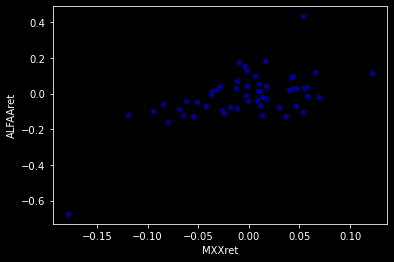

In [2]:
#Do a scatter plot including the regression line and interpret the plot
sr.plot.scatter(x='MXXret', y='ALFAAret',c='DarkBlue')
plt.show()

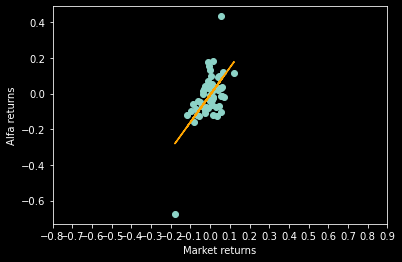

In [3]:
#re-do the scatter plot trying to make the X and Y axis using the same range of values
plt.clf()
x=sr['MXXret']
y = sr['ALFAAret']
plt.scatter(x, y)
# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.80,1,0.1))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

In [4]:
#Run the market regression model (the Y=stock return, the X=market return). You can use the function OLS from the statsmodels.api library.
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression: 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     29.10
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.63e-06
Time:                        14:11:50   Log-Likelihood:                 43.901
No. Observations:                  55   AIC:                            -83.80
Df Residuals:                      53   BIC:                            -79.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.015     -0.501      0.6

In [5]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sr['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = sr[selcols].values
# I set y as the dependent variable:
y = sr['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients) 
betas = np.matmul(invtxt,xty)
betas

array([-0.00750561,  1.52737616])

**E[ALFAret]= -0.0075056132861929395 + 1.5273762316983732*MXXret.**

CHALLENGE: Estimate moving betas for the market regression model

In [6]:
#monthly stock prices for ALFAA.MX and the market (^MXX) from Jan 2010 to Jul 2022, and calculate cc returns.
# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2010", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

In [7]:
#Run rolling regressions and save the moving bo and b1 coefficients for all time windows.
from statsmodels.regression.rolling import RollingOLS
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

,const,MXXret
Date,,
2022-04-01,-0.016308,1.803981
2022-05-01,-0.014117,1.816945
2022-06-01,-0.012129,1.720952
2022-07-01,-0.012282,1.706227
2022-08-01,-0.010296,1.689406


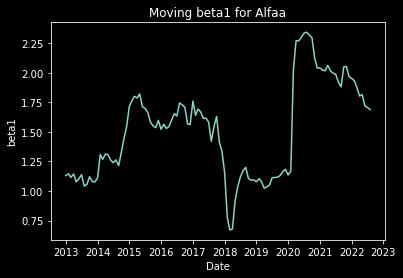

In [8]:
#plot to see how b0 and b1 has changed over time.
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

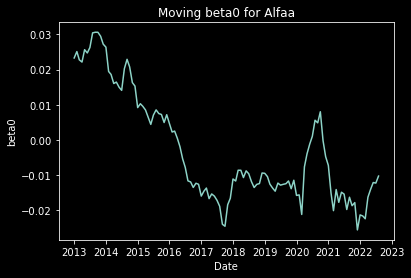

In [9]:
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

In [10]:
betas.describe()

,const,MXXret
count,116.000000,116.000000
mean,-0.002681,1.514944
std,0.015548,0.400789
min,-0.025598,0.671151
25%,-0.014234,1.134707
50%,-0.009568,1.549216
75%,0.008118,1.791329
max,0.030594,2.343574
